### Import configuration and data.

In [1]:
%load_ext autoreload
%autoreload 2

from trainer import *

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {} device".format(device))

configfile = 'pr-SNL_MSU_DOE_sp-random_va-True_ph-False_ba-False_pa-500_ep-2000_lr-0034_we-0019_ba-1024_n-200_se-False'

trainer = Trainer(device=device)
## Set params
trainer.load_config(default_configfile=configfile)
## Set datasets
trainer.load_data()

Using cpu device
Dataset size: 2371 790 792


### Gaussian process-based Bayes hyperparameter optimization (Optional)

In [2]:
trainer.params = trainer.bayes()
print(trainer.params)

Bayes optimization not activated in configuration file. Return preset chosen_params.
{'lr': 0.0034560325081541875, 'weight_decay': 0.0019904362054363267, 'batch_size': 1024}


### Training

Epoch: 1/2000, Train loss: 13.5765, Val loss: 5.0930
Epoch: 100/2000, Train loss: 0.2047, Val loss: 0.2851
Epoch: 200/2000, Train loss: 0.1673, Val loss: 0.3024
Epoch: 300/2000, Train loss: 0.1445, Val loss: 0.2700
Epoch: 400/2000, Train loss: 0.1366, Val loss: 0.2521
Epoch: 500/2000, Train loss: 0.1239, Val loss: 0.2490
Epoch: 600/2000, Train loss: 0.1141, Val loss: 0.2547
Epoch: 700/2000, Train loss: 0.1197, Val loss: 0.2488
Epoch: 800/2000, Train loss: 0.1095, Val loss: 0.2983
Epoch: 900/2000, Train loss: 0.1116, Val loss: 0.2533
Epoch: 1000/2000, Train loss: 0.1015, Val loss: 0.2472
Epoch: 1100/2000, Train loss: 0.1110, Val loss: 0.2318
Epoch: 1200/2000, Train loss: 0.1033, Val loss: 0.2634
Epoch: 1300/2000, Train loss: 0.0924, Val loss: 0.2550
Epoch: 1400/2000, Train loss: 0.1064, Val loss: 0.2375
Epoch: 1500/2000, Train loss: 0.0971, Val loss: 0.2747
Epoch: 1600/2000, Train loss: 0.0985, Val loss: 0.2702
Epoch: 1700/2000, Train loss: 0.0902, Val loss: 0.2869
Early stopping at epo

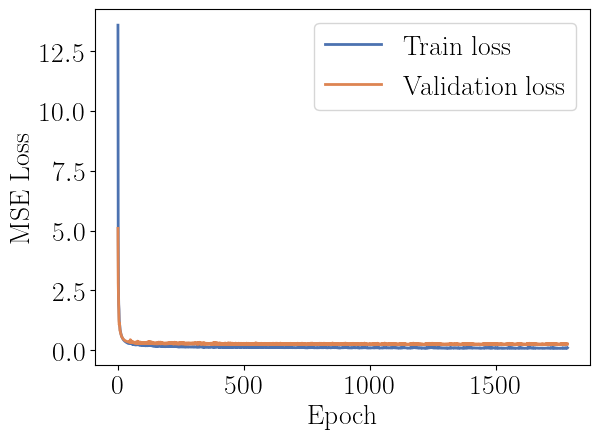

In [3]:
trainer.train()
trainer.plot_loss()

### Plotting predictions and comparing with baseline models.

Train MSE Loss: 0.0822, R2: 0.9498
Validation MSE Loss: 0.2313, R2: 0.8498
Test MSE Loss: 0.2366, R2: 0.8608


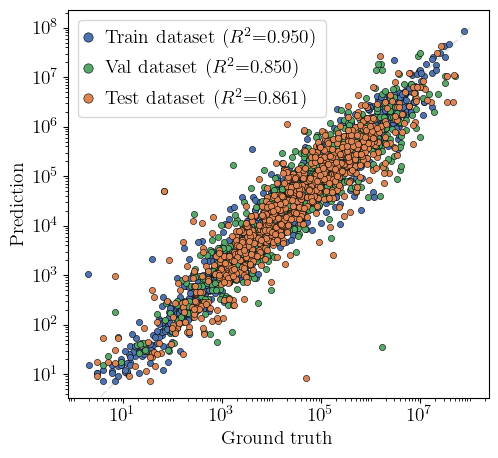

In [4]:
trainer.plot_truth_pred()

Train MSE Loss: 0.0586, R2: 0.9642
Test MSE Loss: 0.2401, R2: 0.8587


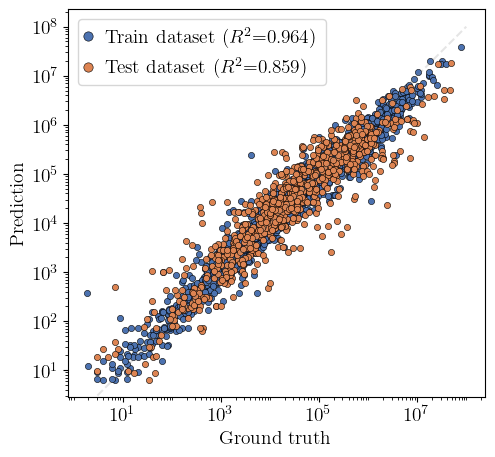

In [5]:
trainer.plot_truth_pred_sklearn(model_name='rf')

### Permutation feature importance

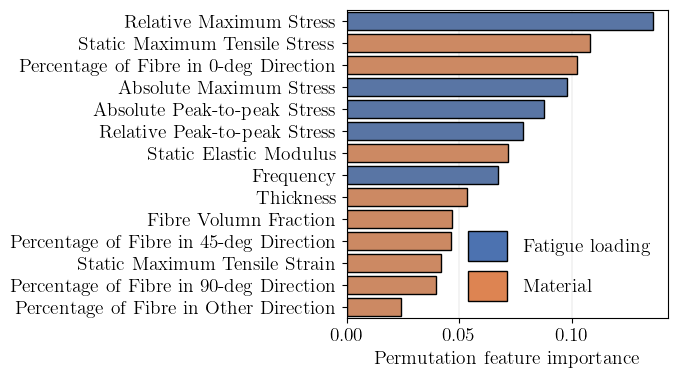

In [6]:
trainer.plot_feature_importance()

### Partial dependence

Calculate PDP:  Percentage of Fibre in 0-deg Direction
Calculate PDP:  Percentage of Fibre in 45-deg Direction
Calculate PDP:  Percentage of Fibre in 90-deg Direction
Calculate PDP:  Percentage of Fibre in Other Direction
Calculate PDP:  Absolute Maximum Stress
Calculate PDP:  Absolute Peak-to-peak Stress
Calculate PDP:  Frequency
Calculate PDP:  Fibre Volumn Fraction
Calculate PDP:  Relative Maximum Stress
Calculate PDP:  Relative Peak-to-peak Stress
Calculate PDP:  Thickness
Calculate PDP:  Static Maximum Tensile Stress
Calculate PDP:  Static Maximum Tensile Strain
Calculate PDP:  Static Elastic Modulus


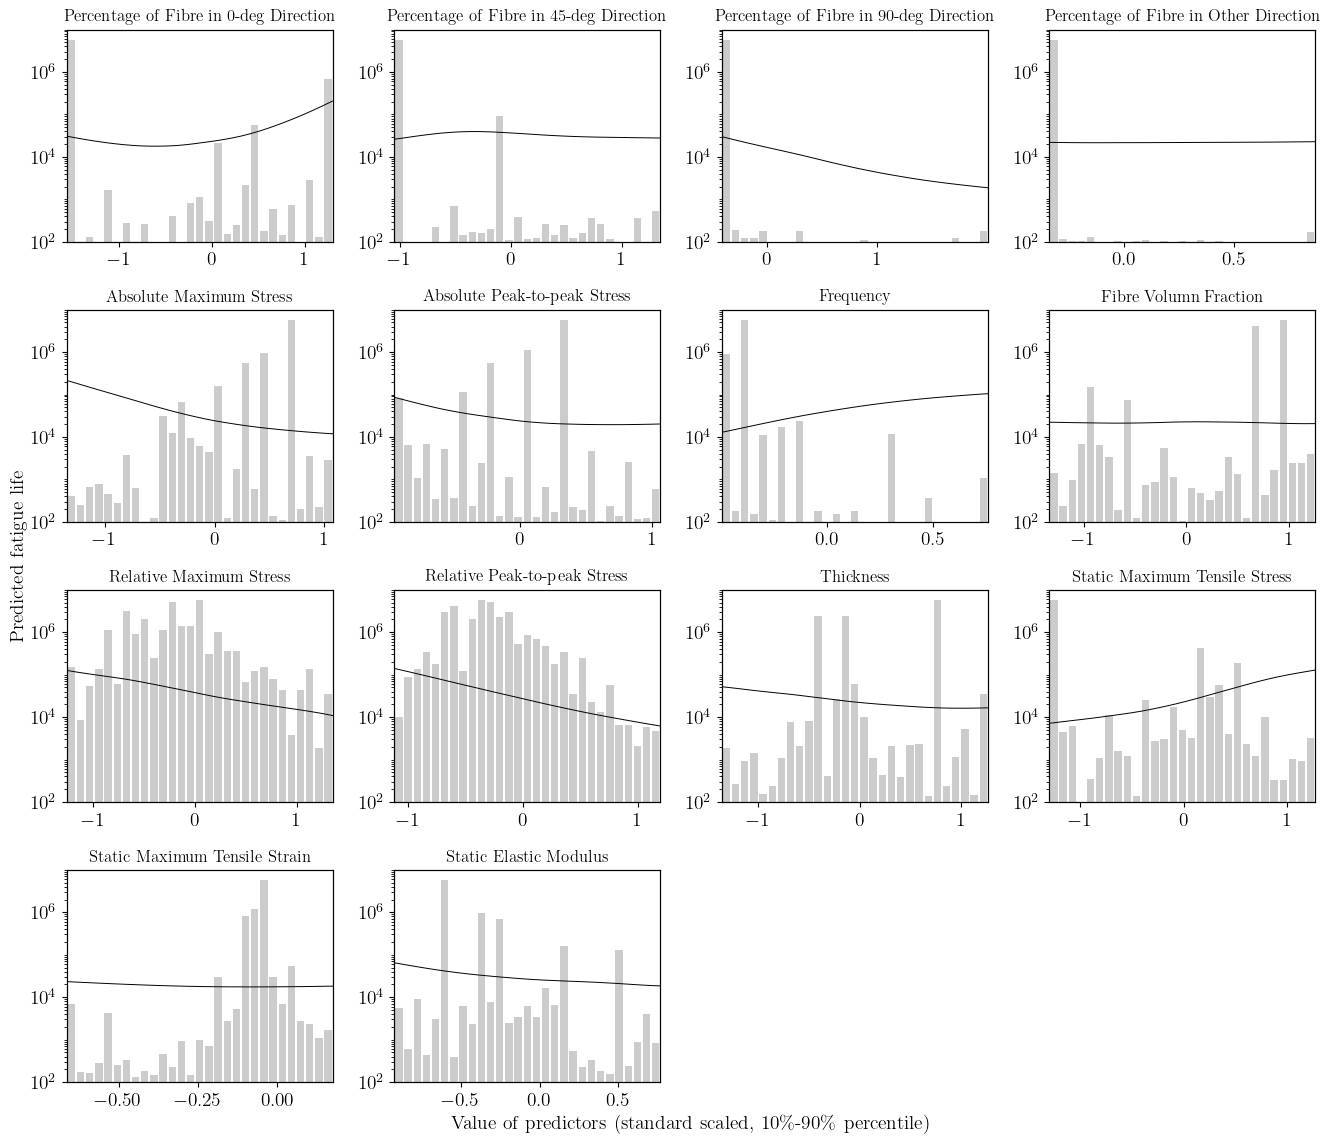

In [7]:
trainer.plot_partial_dependence()

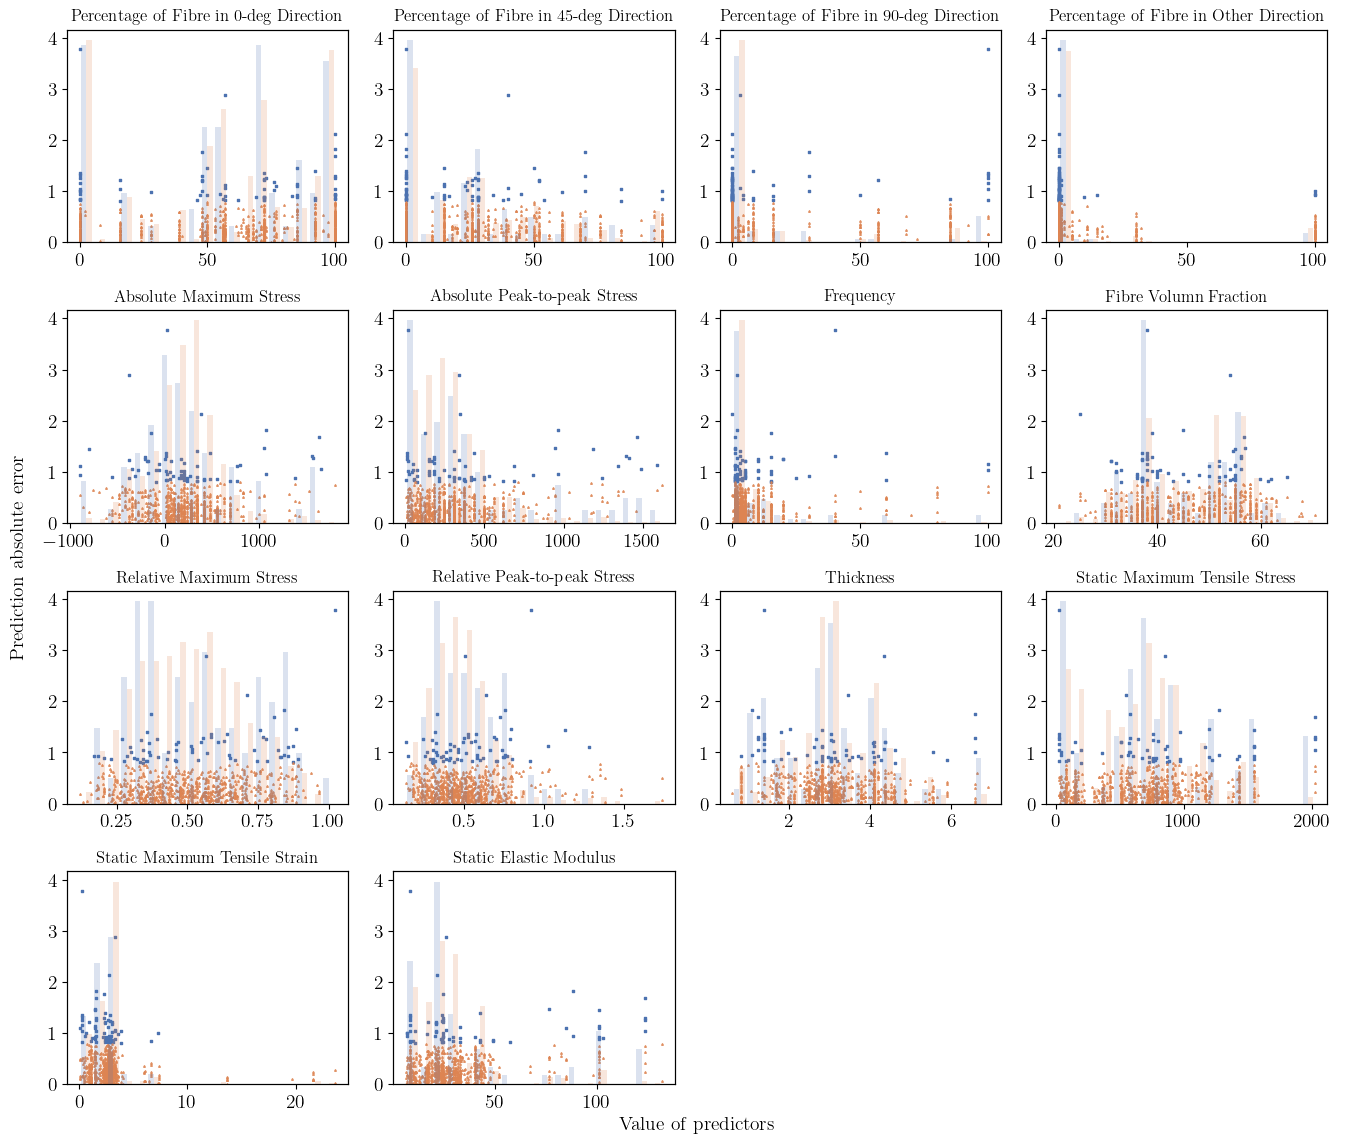

In [8]:
trainer.plot_partial_err()